In [2]:
import json
import numpy as np
from tqdm import tqdm

In [3]:
file_path = "../Datasets/artpedia/artpedia.json"
with open(file_path, 'r') as f:
    artpedia = json.load(f)

In [4]:
images = []
for k in artpedia:
    url = artpedia[k]['img_url']
    title = artpedia[k]['title']
    images.append((title, url))

In [5]:
import urllib.request

def download_img(title, img_url, i):
    request = urllib.request.Request(img_url)
    try:
        img_name = title+ ".jpg"
        path = "D:/Vincent/melbuni/NLP_Research/Datasets/artpedia/images/"
        responsee = urllib.request.urlopen(request)
        filename = path + str(i) + ".jpg"
        if (responsee.getcode() == 200):
            with open(filename, "wb") as f:
                f.write(responsee.read()) 
            with open(path+"title2idx.txt",'a', encoding='utf-8') as f:    #设置文件对象
                f.write(title + " , " + str(i))   
                f.write("\n")
            print(img_name + ":  SAVED")
    except Exception as e:
        print("FAIL!!")
        with open(path+"fail_images.txt", 'a') as f:
            f.write(str(i) + " , " + title +" , " + img_url + "\n")
#         print(": failed"+str(responsee.getcode()))
#         pass


In [7]:
for i in range(2928, len(images)):
    title, url = images[i]
    print(i, url)
    download_img(title, url, i)

2928 https://upload.wikimedia.org/wikipedia/en/0/04/Neo_Rauch_Jagdzimmer.png
Hunter's Room.jpg:  SAVED
2929 https://upload.wikimedia.org/wikipedia/en/3/37/Neo_Rauch_Warten_auf_die_Barbaren.png
Waiting for the Barbarians (painting).jpg:  SAVED


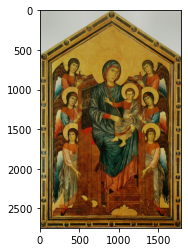

In [76]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('D:/Vincent/melbuni/NLP_Research/Datasets/artpedia/images/Maestà (Cimabue).jpg')
imgplot = plt.imshow(img)
# plt.show()

# change the size of images

In [14]:
import os 
from PIL import Image
import PIL
import torchvision.transforms as transforms

In [10]:
path = "D:/Vincent/melbuni/NLP_Research/Datasets/artpedia/images"
img_names = os.listdir(path)

new_path = "D:/Vincent/melbuni/NLP_Research/Datasets/artpedia/resize_images"

In [48]:
img_names.index('1144.jpg')

162

In [49]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.MAX_IMAGE_PIXELS = None
for name in img_names[163:]:   
    try:
        img_test = Image.open(path + "/" + name)
        tran = img_test.resize((1024, 1024), Image.ANTIALIAS).convert('RGB')
        tran.save(new_path + "/" + name)
    except:
        print(name)

277.jpg
2912.jpg
641.jpg
684.jpg
725.jpg
fail_images.txt
title2idx.txt
